#**Playstore Analysis EDA**

In [ ]:
#Mounting the Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#mapping paths
playstore_data='/content/drive/MyDrive/Copy of Play Store Data.csv'
userreview_data='/content/drive/MyDrive/Copy of User Reviews.csv'
df_playstore_data=pd.read_csv(playstore_data)
df_user_review=pd.read_csv(userreview_data)

#Basic Inspection of the *Dataset*

In [ ]:
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


**let's have a look at our dataset :-**



* App :- Name of the App
* Category :- Category under which the App falls.
* Rating :- Application's rating on playstore
* Reviews :- Number of reviews of the App.
* Size :- Size of the App.
* Install :- Number of Installs of the App
* Type :- Whether the App is free/paid
* Price :- Price of the app (0 if it is Free)
* Content Rating :- Appropriate Target Audience of the App.
* Genres:- Genre under which the App falls.
* Last Updated :- Date when the App was last updated
* Current Ver :- Current Version of the Application
* Android Ver :- Minimum Android Version required to run the App

In [78]:
df_user_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As we can here there are Null data as well as the Dtypes are Objects .
In order to to perform an Exploratory Data Analysis on this DataFrame we need to convert them into numerical data 

In [ ]:
df_playstore_data.columns


Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
df_playstore_data.shape

(10841, 13)

##Removing NULL Values from the Data Frame

In [ ]:
df_playstore_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

**The number of null values are:**

Rating has 1474 null values which contributes almost 14% of the data. Type and Content_Rating contributes 0.01% null values of the data. Current_Ver has 8 null values which contributes 0.07% of the data. Android_Ver contributes 0.03% null values of the data.

* Let's first deal with the columns which contains heigher number of NaN values.By going through the NaN values, we must come up with a way to replace them with non NaN values because it is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis.
* We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.

**Rating: This column contains 1474 NaN values**

We can replace the null values the aggregate (mean or median) of the remaining values in the Rating column.


In [ ]:
#Replacing NULL values in rating by their Mean values
df_playstore_data['Rating'].fillna(df_playstore_data['Rating'].mean(),inplace=True)

In [ ]:
#rounding off the decimals of rating to 1
df_playstore_data['Rating']=df_playstore_data['Rating'].round(1)

Now we need to remove extra objects and letter from the data set for making parsing to happen and then convert them from object to numeric form

In [ ]:
df_playstore_data['Category']=df_playstore_data['Category'].replace("1.9",np.nan)
df_playstore_data['Price']=df_playstore_data['Price'].replace('Everyone','0')
df_playstore_data['Installs']=df_playstore_data['Installs'].replace('Free','0')
df_playstore_data['Size']=df_playstore_data['Size'].replace("Varies with device","")
df_playstore_data['Rating']=df_playstore_data['Rating'].replace(19,1.2)

In [ ]:
'''
This function removes all the extra objects from individual numerics so
that they can be converted into numeric form
'''
def remover(num):
  if '+' in num:
    num = num.replace('+','')
  if ',' in num:
    num = num.replace(',','')
  if '$' in num:
    num = num.replace('$','')
  if 'NaN' in num:
    num = '0'
  if 'k' in num:
    num=num.replace('k','')
  if 'm' in num:
    num=num.replace('m','')
  if 'K' in num:
    num=num.replace('K','')
  if 'M' in num:
    num=num.replace('M','')
  else:
    pass
  return num

In [ ]:
#Changing the 'Installs' column values into valid numeric values
df_playstore_data['Installs'] = pd.to_numeric(df_playstore_data['Installs'].map(lambda x: remover(x)))


#Changing the 'Price' column values into valid numeric values
df_playstore_data['Price'] = pd.to_numeric (df_playstore_data['Price'].map(lambda x:  remover(x)))

#for reviews 
df_playstore_data['Reviews']=df_playstore_data['Reviews'].apply(lambda x: x.rstrip('M'))
df_playstore_data['Reviews']=pd.to_numeric(df_playstore_data['Reviews'])

#for Size
df_playstore_data['Size'] = pd.to_numeric (df_playstore_data['Size'].map(lambda x:  remover(x)))


In [ ]:
df_playstore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10841 non-null  float64
 3   Reviews         10841 non-null  float64
 4   Size            9146 non-null   float64
 5   Installs        10841 non-null  int64  
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.1+ MB


As we can see all the all the Data is cleaned , convert to numeric form is ready for visualization 

##**Now we proceed in  the visualisation part**

In [ ]:
#for figure size
plt.rcParams['figure.figsize']=(10,7)

## 1. Getting the average Rating of the Apps 

Text(0.5, 1.0, "Average Rating's")

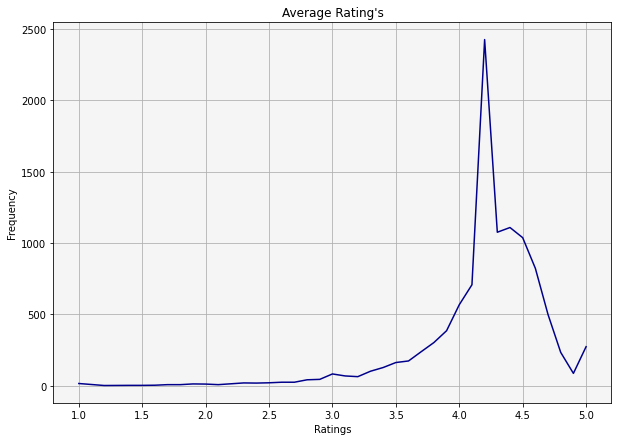

In [79]:
#visualising the total Ratings from the dataframe
df_playstore_data['Rating'].value_counts().sort_index().plot(kind='line',color='darkblue',linestyle='-').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.grid(axis='x')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title("Average Rating's")

**After plotting the Line graph on the Ratings data **
* We can observe a gradual increase in the ratings in the graphical representation

* We can see that the amongst all the apps most of the application have ratings between 4.1 to 4.4 
* If we calcalute the rating in natural numeric form we get,



In [ ]:
'''
Fuction to convert all the ratings into  natural numbers
'''
def rator(rat):
  if 1<=rat<=1.9:
    return 1
  if 2<=rat<=2.9:
    return 2
  if 3<=rat<=3.9:
    return 3
  if 4<=rat<=4.9:
    return 4
  if rat==5:
    return 5


In [ ]:
df_playstore_data['Round_Rating']=df_playstore_data['Rating'].apply(lambda x : rator(x))

* There are over 8000 application rated as 4  
* 4* creates a majority in the rating system

Text(0.5, 1.0, 'Whole Ratings')

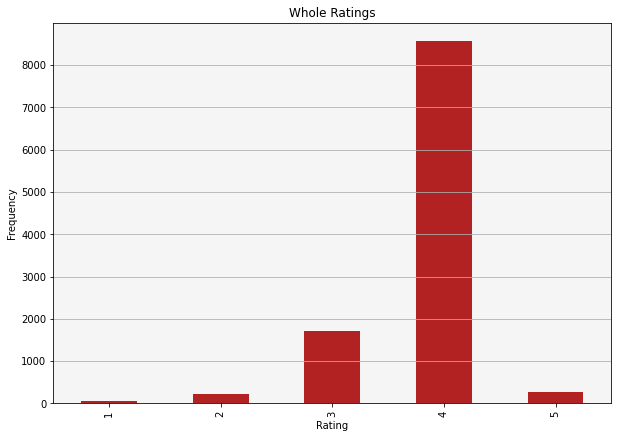

In [80]:
df_playstore_data['Round_Rating'].value_counts().sort_index().plot(kind='bar',color='firebrick').set_facecolor('whitesmoke')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.title('Whole Ratings')


**After going through the dataframe Categories we get few questions in our mind like**
* How many applictations are there in each category 
* Which are the categories with highest number of appliction 
* Which are the categories of application that are installed the most 

##2.Checking the count of application in each category

Text(0, 0.5, 'Categories')

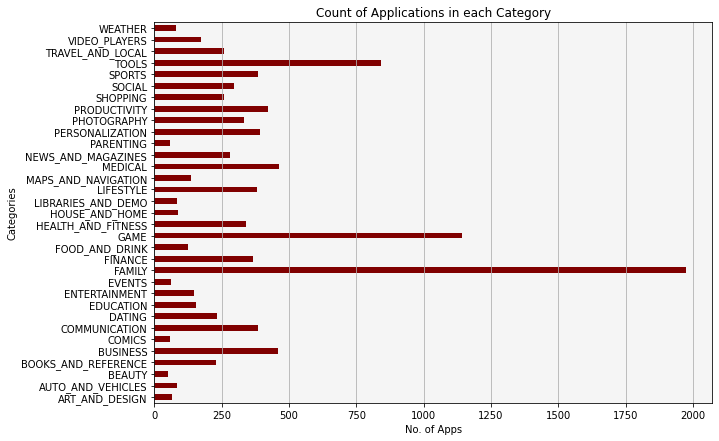

In [ ]:
#Creating a Graph of count of Applications in each category categories
ax=df_playstore_data['Category'].value_counts().sort_index().plot(kind='barh',color='maroon').set_facecolor('whitesmoke')
plt.grid(axis='x')
plt.title('Count of Applications in each Category')
plt.xlabel('No. of Apps')
plt.ylabel('Categories')

##3.Getting the number of installs in each Category

Text(0.5, 1.0, 'Number of Installs in each category')

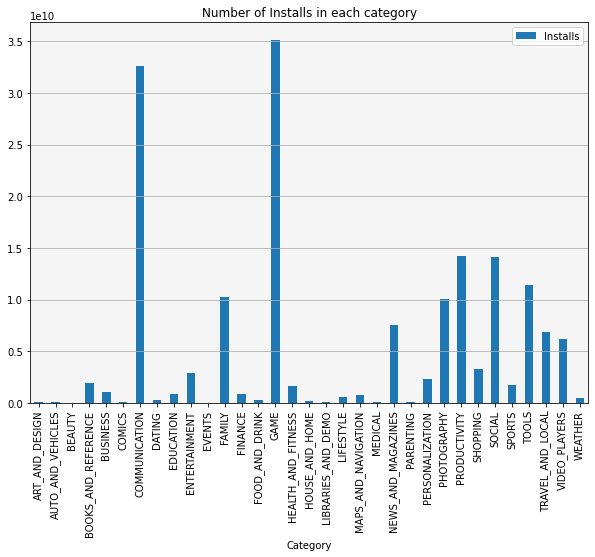

In [ ]:
#Bar graph of Number of installs in each category
category_installs = df_playstore_data.groupby(['Category'])[['Installs']].sum()
category_installs.plot(kind='bar').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.title('Number of Installs in each category')

##4.Checking Corelation 

In [ ]:
heater=df_playstore_data[['Rating','Reviews','Size','Installs','Price']]
cor=heater.corr()
cor

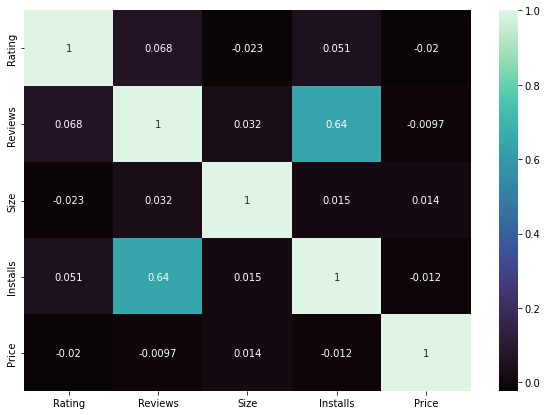

In [ ]:
sns.heatmap(cor,annot=True,cmap='mako')

##*We can see here that almost every variable in uncorrelated except **reviews**. Changes in reviews seems to have some effect on number of installs here*

###As we can see from the Bar Graph and heatmap that the top 2 categories with most installs are that of ***Communication*** and ***Games*** application
* The **Heatmap** plotted of the Categories shows the color variations of various categories 
* We can see that the ***Communication*** and ***Games*** categories in the heatmap are the most light colours with respect to others reprentating that they are most installed 

In [ ]:
df_playstore_data['Size']=df_playstore_data['Size'].round(1)

##5. Getting App Size Distribution 

In [ ]:
def size_collective(size):
  if 1<=size<=10:
    return 10
  if 11<=size<=20:
    return 20
  if 21<=size<=30:
    return 30
  if 31<=size<=40:
    return 40 
  if 41<=size<=50:
    return 50
  if 51<=size<=60:
    return 60
  if 61<=size<=70:
    return 70
  if 71<=size<=80:
    return 80
  if 81<=size<=90:
    return 90
  if 91<=size<=100:
    return 100
  

In [ ]:
df_playstore_data['Size_collective']=df_playstore_data['Size'].apply(lambda x: size_collective(x) )

Text(0.5, 1.0, 'App size Distribution')

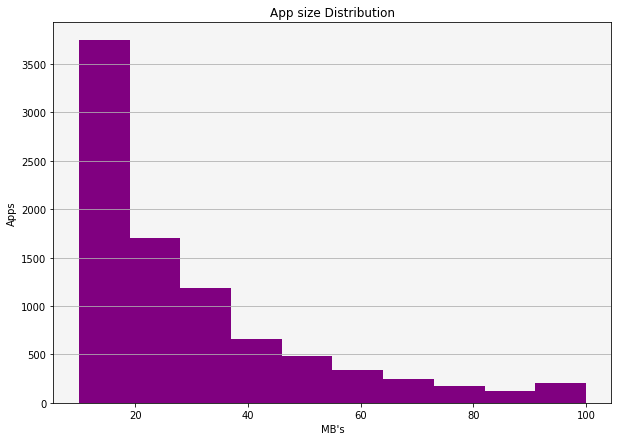

In [ ]:
df_playstore_data['Size_collective'].plot(kind='hist',color='purple').set_facecolor('whitesmoke')
plt.grid(axis='y')
plt.xlabel("MB's")
plt.ylabel('Apps')
plt.title('App size Distribution')

In [ ]:
df_playstore_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Round_Rating,Size_collective
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4,20.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3,20.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4,10.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4,30.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4,10.0


##6. Getting the number of installs with respect to the size of the application

In [ ]:
installs_on_size=df_playstore_data.groupby(['Size_collective'])[['Installs']].sum()

Text(0.5, 1.0, 'No. of installs due to size distributions')

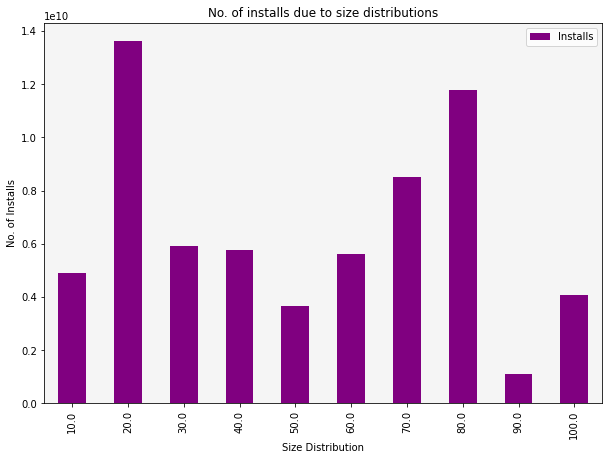

In [81]:
installs_on_size.plot(kind='bar',color='purple').set_facecolor('whitesmoke')
plt.ylabel('No. of Installs')
plt.xlabel('Size Distribution')
plt.title('No. of installs due to size distributions')